In [1776]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [1777]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")




In [1778]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


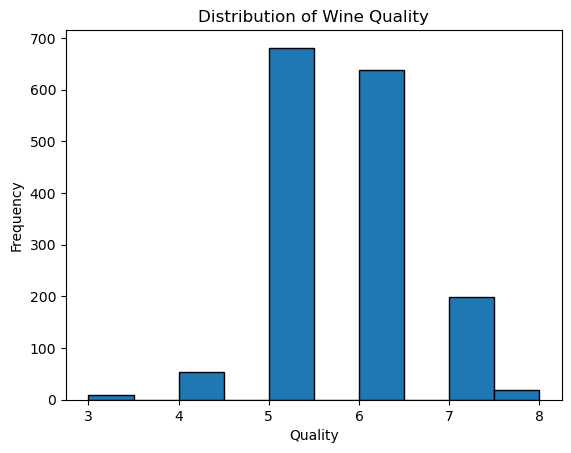

In [1779]:
target = data['quality']

# Plot the distribution of the target variable
plt.hist(target, bins=10, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

In [1780]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Epoch 1/200
40/40 [==============================] - 1s 6ms/step - loss: 14.0560 - val_loss: 4.8958
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5016 - val_loss: 1.9373
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 1.5135 - val_loss: 1.4888
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 1.1806 - val_loss: 1.2195
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.9717 - val_loss: 1.0460
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8278 - val_loss: 0.9186
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7267 - val_loss: 0.7777
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6099 - val_loss: 0.6486
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5312 - val_loss: 0.5869
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4763 - val_loss: 0.6001
Epoch 11

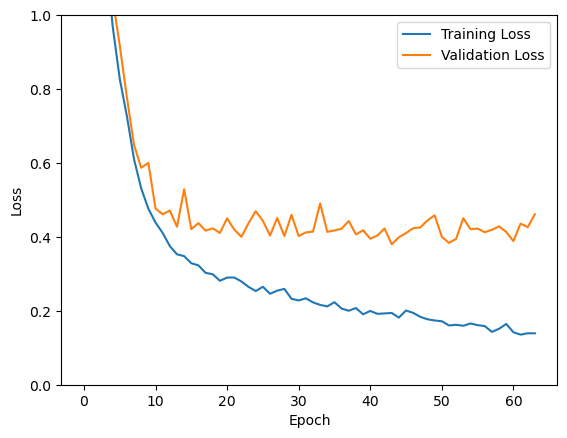

In [1781]:
# Split the dataset into input features (X) and the target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define class weights
class_weights = {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 0.7, 6: 0.7, 7: 1, 8: 3, 9: 1}

# Build a neural network model using Keras
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer with a single node for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32,
                    callbacks=[early_stopping], verbose=1, class_weight=class_weights)

# Evaluate the model on test data
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim(0, 1)  # Set y-axis limits to 0-1
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

I use all features to build the model because I think all features have an impact on the target (quality). The data has no NA values, and the target is a nearly normal distribution. I use NN with 4 layers because I want to practice my new knowledge about NN, but I think you can use Sklearn linear regression or binary classification to separate bad wine or good wine too. class_weights is used to increase accuracy when the target is not 5 or 6. Early stopping is used to stop training when training loss is more different from val loss. I use mSE to evaluate the model (mSE is 0.38).